In [ ]:
#Importing CSV file 

from google.colab import files

  
  
uploaded = files.upload()

Saving Retail_Credit_Risk_Model_One.csv to Retail_Credit_Risk_Model_One.csv


In [ ]:
# Converting CSV File into Pandas Data Frame 

import pandas as pd 
import io 
  
credit = pd.read_csv(io.BytesIO(uploaded['Retail_Credit_Risk_Model_One.csv'])) 
print(credit)

       Cust_ID  loan_status  loan_amnt  ...  home_ownership annual_inc  age
0            1            0       5000  ...            RENT      24000   33
1            2            0       2400  ...            RENT      12252   31
2            3            0      10000  ...            RENT      49200   24
3            4            0       5000  ...            RENT      36000   39
4            5            0       3000  ...            RENT      48000   24
...        ...          ...        ...  ...             ...        ...  ...
29087    29088            0       2500  ...        MORTGAGE     110000   27
29088    29089            0       8500  ...            RENT      18000   25
29089    29090            0       5000  ...        MORTGAGE     100000   27
29090    29091            0       5000  ...        MORTGAGE     200000   23
29091    29092            0       7500  ...             OWN      22000   25

[29092 rows x 9 columns]


In [ ]:
# Check data cleanliness - head & tail

credit.head()

,Cust_ID,loan_status,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,age
0,1,0,5000,10.65,B,10.0,RENT,24000,33
1,2,0,2400,NaN,C,25.0,RENT,12252,31
2,3,0,10000,13.49,C,13.0,RENT,49200,24
3,4,0,5000,NaN,A,3.0,RENT,36000,39
4,5,0,3000,NaN,E,9.0,RENT,48000,24


In [ ]:
credit.tail()

,Cust_ID,loan_status,loan_amnt,int_rate,grade,emp_length,home_ownership,annual_inc,age
29087,29088,0,2500,8.07,A,4.0,MORTGAGE,110000,27
29088,29089,0,8500,10.28,C,3.0,RENT,18000,25
29089,29090,0,5000,8.07,A,0.0,MORTGAGE,100000,27
29090,29091,0,5000,7.43,A,0.0,MORTGAGE,200000,23
29091,29092,0,7500,NaN,E,0.0,OWN,22000,25


In [ ]:
# Understand Data Type and identify Null Values

credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29092 entries, 0 to 29091
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cust_ID         29092 non-null  int64  
 1   loan_status     29092 non-null  int64  
 2   loan_amnt       29092 non-null  int64  
 3   int_rate        26316 non-null  float64
 4   grade           29092 non-null  object 
 5   emp_length      28283 non-null  float64
 6   home_ownership  29092 non-null  object 
 7   annual_inc      29092 non-null  int64  
 8   age             29092 non-null  int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 2.0+ MB


In [ ]:
# Identify number of Null Values in each column

credit.isnull().sum()

Cust_ID              0
loan_status          0
loan_amnt            0
int_rate          2776
grade                0
emp_length         809
home_ownership       0
annual_inc           0
age                  0
dtype: int64

In [ ]:
# Dropping Null Values for quick analysis (Although Knn Imputer is an applicable procedure for these missing records)

credit = credit.dropna().reset_index()

In [ ]:
# Validation of removal of Null Values

credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25571 entries, 0 to 25570
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           25571 non-null  int64  
 1   Cust_ID         25571 non-null  int64  
 2   loan_status     25571 non-null  int64  
 3   loan_amnt       25571 non-null  int64  
 4   int_rate        25571 non-null  float64
 5   grade           25571 non-null  object 
 6   emp_length      25571 non-null  float64
 7   home_ownership  25571 non-null  object 
 8   annual_inc      25571 non-null  int64  
 9   age             25571 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 2.0+ MB


In [ ]:
#View frequency of Loan Staus

credit['loan_status'].value_counts()

0    22779
1     2792
Name: loan_status, dtype: int64

In [ ]:
#View frequency of each category in grade column

credit['grade'].value_counts()

A    8412
B    8174
C    5079
D    2888
E     783
F     182
G      53
Name: grade, dtype: int64

In [ ]:
#Customers on mortgage / rent have a higher default rate

pd.crosstab(credit['loan_status'],credit['home_ownership'])

home_ownership,MORTGAGE,OTHER,OWN,RENT
loan_status,,,,
0,9507,69,1740,11463
1,1019,16,205,1552


In [ ]:
#Propotion of the above table - Event rate

pd.crosstab(credit['loan_status'],credit['home_ownership'], normalize='columns')

home_ownership,MORTGAGE,OTHER,OWN,RENT
loan_status,,,,
0,0.903192,0.811765,0.894602,0.880753
1,0.096808,0.188235,0.105398,0.119247


In [ ]:
#Capture Rate

pd.crosstab(credit['loan_status'],credit['home_ownership'], normalize='index')


home_ownership,MORTGAGE,OTHER,OWN,RENT
loan_status,,,,
0,0.417358,0.003029,0.076386,0.503227
1,0.364971,0.005731,0.073424,0.555874


In [ ]:
#Is Interest rate continuous or discrete - continuous

credit['int_rate'].value_counts()

7.51     662
10.99    659
7.88     569
7.49     554
5.42     485
        ... 
16.71      1
23.22      1
22.48      1
16.59      1
20.48      1
Name: int_rate, Length: 348, dtype: int64

In [ ]:
#Number of Unique values

credit['int_rate'].nunique()

348

In [ ]:
#Label encoding Grade variable for decision tree

credit['grade'] = pd.Categorical(credit['grade']).codes

In [ ]:
credit['grade'].value_counts()

0    8412
1    8174
2    5079
3    2888
4     783
5     182
6      53
Name: grade, dtype: int64

In [ ]:
#Label encoding Home Ownership variable for decision tree

credit['home_ownership'] = pd.Categorical(credit['home_ownership']).codes

In [ ]:
credit['home_ownership'].value_counts()

3    13015
0    10526
2     1945
1       85
Name: home_ownership, dtype: int64

In [ ]:
#Dropping unwanted columns - Index, Customer ID

credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25571 entries, 0 to 25570
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           25571 non-null  int64  
 1   Cust_ID         25571 non-null  int64  
 2   loan_status     25571 non-null  int64  
 3   loan_amnt       25571 non-null  int64  
 4   int_rate        25571 non-null  float64
 5   grade           25571 non-null  int8   
 6   emp_length      25571 non-null  float64
 7   home_ownership  25571 non-null  int8   
 8   annual_inc      25571 non-null  int64  
 9   age             25571 non-null  int64  
dtypes: float64(2), int64(6), int8(2)
memory usage: 1.6 MB


In [ ]:
credit.drop(['index', 'Cust_ID'],axis=1, inplace= True)

In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25571 entries, 0 to 25570
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   loan_status     25571 non-null  int64  
 1   loan_amnt       25571 non-null  int64  
 2   int_rate        25571 non-null  float64
 3   grade           25571 non-null  int8   
 4   emp_length      25571 non-null  float64
 5   home_ownership  25571 non-null  int8   
 6   annual_inc      25571 non-null  int64  
 7   age             25571 non-null  int64  
dtypes: float64(2), int64(4), int8(2)
memory usage: 1.2 MB


In [ ]:
#Start of Descriptive Analysis

import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


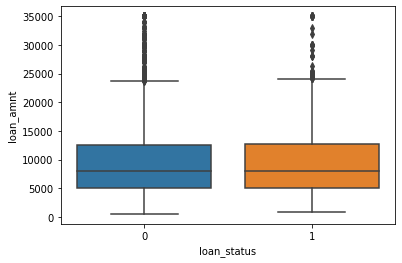

In [ ]:
#Mean in case of Defaulters and Non-Defaulters is almost in the same range

sns.boxplot(credit['loan_status'], credit['loan_amnt'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


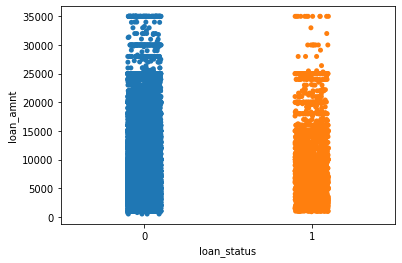

In [ ]:
sns.stripplot(credit['loan_status'], credit['loan_amnt'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


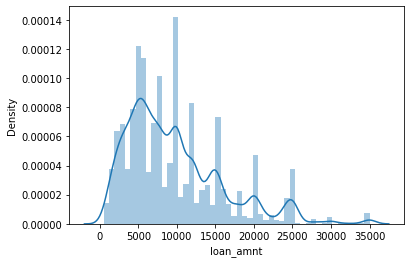

In [ ]:
#Loan Amount is a right skewed distribution 

sns.distplot(credit['loan_amnt'])

In [ ]:
#Model Building - Decision Tree
#Separating Independent Variables (X) and Dependent Variable (y)

X = credit.drop('loan_status', axis = 1)

y = credit.pop('loan_status')

In [ ]:
#Splitting data into 70% train & 30% test samples

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
#Importing Model Function

from sklearn.tree import DecisionTreeClassifier

In [ ]:
#Defining Leaf (1-3% of 17.5k training records - less than 1%) & Split (2-3x of leaf)

credit_model = DecisionTreeClassifier(min_samples_leaf=100,min_samples_split=200)

In [ ]:
#Fitting Training Data using Decision Tree CLassifier

credit_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
credit_model.score(X_train,y_train)

0.8884295212023018

In [ ]:
credit_model.score(X_test,y_test)

0.8963764337851929

In [ ]:
#Predict probability of default 

credit_model.predict_proba(X_train)[:,1]

array([0.        , 0.13661202, 0.0726257 , ..., 0.15172414, 0.09160305,
       0.        ])

In [ ]:
credit_model.predict_proba(X_test)[:,1]

array([0.26732673, 0.03636364, 0.06299213, ..., 0.19230769, 0.13496933,
       0.10091743])

# Thank You , Rudhra !